#Introducción a NLP con Python y NLTK

---

## 1. Familiarización básica con Python
Antes de trabajar con corpus o NLP, los estudiantes deben estar cómodos con conceptos básicos de Python.

### Ejercicios:
1. Escribir un script que cuente el número de palabras en un texto simple.

In [2]:
texto = "Hola mundo"
num_palabras = len(texto.split())
print(f"[Indicador] Numero de palabras: {num_palabras}")

[Indicador] Numero de palabras: 2


2. Manipular cadenas: convertir texto a minúsculas, eliminar signos de puntuación.

In [4]:
import string
texto = "Hola!!! PERDON por gritar"
texto_limpio = texto.lower().translate(str.maketrans('', '', string.punctuation))
print(f"[Indicador] Texto limpio: {texto_limpio}")

[Indicador] Texto limpio: hola perdon por gritar


3. Usar estructuras de datos básicas como listas y diccionarios para almacenar palabras y sus frecuencias.

In [35]:
from collections import Counter

texto = "El procesamiento de lenguaje natural es interesante y útil."
palabras = texto.split()
frecuencias = Counter(palabras)
print("Frecuencias de palabras:", dict(frecuencias))


Frecuencias de palabras: {'El': 1, 'procesamiento': 1, 'de': 1, 'lenguaje': 1, 'natural': 1, 'es': 1, 'interesante': 1, 'y': 1, 'útil.': 1}


---

## 2. Introducción a NLTK
Familiarizarse con la biblioteca **NLTK** y su instalación.

### Actividad:
1. Instalar **NLTK** en Google Colab:

  ```python

In [15]:
!pip install nltk
import nltk
nltk.download('punkt')

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


True

```
2. Usar `nltk.word_tokenize` para dividir un texto en palabras.

In [18]:
import nltk
nltk.download('punkt_tab')
from nltk.tokenize import word_tokenize

texto = "Programar estresa mucho   :)"
tokens = word_tokenize(texto)
print(tokens)

['Programar', 'estresa', 'mucho', ':', ')']


[nltk_data] Downloading package punkt_tab to /root/nltk_data...
[nltk_data]   Package punkt_tab is already up-to-date!


---

## **3. Trabajar con corpus**
Explorar y manipular corpus utilizando NLTK.

### Corpus preinstalados en NLTK:
Descargar el corpus `nltk.book`:
```python

In [19]:
import nltk
nltk.download('gutenberg')  # Corpus Gutenberg
nltk.download('stopwords') # Palabras vacías

from nltk.corpus import gutenberg
print(gutenberg.fileids())  # Muestra los archivos disponibles

[nltk_data] Downloading package gutenberg to /root/nltk_data...


['austen-emma.txt', 'austen-persuasion.txt', 'austen-sense.txt', 'bible-kjv.txt', 'blake-poems.txt', 'bryant-stories.txt', 'burgess-busterbrown.txt', 'carroll-alice.txt', 'chesterton-ball.txt', 'chesterton-brown.txt', 'chesterton-thursday.txt', 'edgeworth-parents.txt', 'melville-moby_dick.txt', 'milton-paradise.txt', 'shakespeare-caesar.txt', 'shakespeare-hamlet.txt', 'shakespeare-macbeth.txt', 'whitman-leaves.txt']


[nltk_data]   Unzipping corpora/gutenberg.zip.
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


```

### Actividad:
1. Leer un corpus como *"Emma"* de Jane Austen:

    ```python

In [20]:
texto = gutenberg.raw('austen-emma.txt')
print(texto[:500])  # Muestra las primeras 500 letras

[Emma by Jane Austen 1816]

VOLUME I

CHAPTER I


Emma Woodhouse, handsome, clever, and rich, with a comfortable home
and happy disposition, seemed to unite some of the best blessings
of existence; and had lived nearly twenty-one years in the world
with very little to distress or vex her.

She was the youngest of the two daughters of a most affectionate,
indulgent father; and had, in consequence of her sister's marriage,
been mistress of his house from a very early period.  Her mother
had died t


```
2. Contar las palabras únicas y su frecuencia.

  ```python

In [21]:
from collections import Counter
tokens = word_tokenize(texto)
conteo = Counter(tokens)
print(conteo.most_common(10))  # Top 10 palabras más frecuentes

[(',', 12016), ('.', 6355), ('to', 5125), ('the', 4844), ('and', 4653), ('of', 4272), ('I', 3177), ('--', 3100), ('a', 3001), ("''", 2452)]


---

## 4. Tokenización avanzada con expresiones regulares
Entender y personalizar tokenización usando expresiones regulares.

### Ejemplo:

In [22]:
import re
from nltk.tokenize import regexp_tokenize

texto = "The price of oil is $123.45 today. U.S.A. stocks fell by 5%..."
pattern = r'''(?x)
              (?:[A-Z]\.)+         # Abreviaciones como U.S.A.
              | \$?\d+(?:\.\d+)?%? # Monedas y porcentajes
              | \w+(?:-\w+)*       # Palabras con guiones
              | \.\.\.             # Elipsis
              | [][.,;"'?():-_`]   # Otros tokens individuales
            '''
tokens = regexp_tokenize(texto, pattern)
print(tokens)

['The', 'price', 'of', 'oil', 'is', '$123.45', 'today', '.', 'U.S.A.', 'stocks', 'fell', 'by', '5%', '...']


### Ejercicio:
Crear un patrón que reconozca hashtags y menciones de Twitter, como `#NLP` o `@user123`.

In [23]:
import re
from nltk.tokenize import regexp_tokenize

texto = "Juntos con la fuerza #starwars #luk juntos con @George_Lucas"

# Patrón de expresión regular para hashtags y menciones
pattern = r'''(?x)
              (?:\#[\w]+)         # Hashtags como #NLP
              | (?:\@[\w]+)       # Menciones como @user123
            '''

tokens = regexp_tokenize(texto, pattern)
print(tokens)

['#starwars', '#luk', '@George_Lucas']


---

## 5. Stopwords y limpieza de texto
Limpiar texto eliminando palabras irrelevantes ("stopwords").

### Ejemplo:
```python

In [24]:
from nltk.corpus import stopwords

nltk.download('stopwords')
stop_words = set(stopwords.words('english'))

tokens_limpios = [word for word in tokens if word.lower() not in stop_words]
print(tokens_limpios)

['#starwars', '#luk', '@George_Lucas']


[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


### Ejercicio:
Eliminar stopwords de un texto en español (requiere `stopwords.words('spanish')`).

In [25]:
from nltk.corpus import stopwords
import nltk

nltk.download('stopwords')
nltk.download('punkt')


texto_es = "La programacion deberia ser eterna forever"

stop_words = set(stopwords.words('spanish'))


tokens_limpios = [word for word in texto_es.split() if word.lower() not in stop_words]
print(tokens_limpios)


['programacion', 'deberia', 'ser', 'eterna', 'forever']


[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


---

## 6. Visualización de frecuencias
Crear gráficos de frecuencias de palabras para análisis visual.

### Ejemplo:
```python

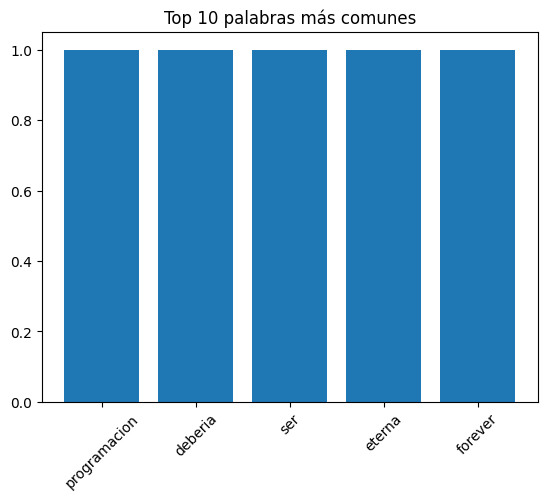

In [27]:
import matplotlib.pyplot as plt
from collections import Counter

frecuencias = Counter(tokens_limpios)
palabras, valores = zip(*frecuencias.most_common(10))

plt.bar(palabras, valores)
plt.title("Top 10 palabras más comunes")
plt.xticks(rotation=45)
plt.show()

```

### Ejercicio:
Crear una **nube de palabras** con la biblioteca `wordcloud`.

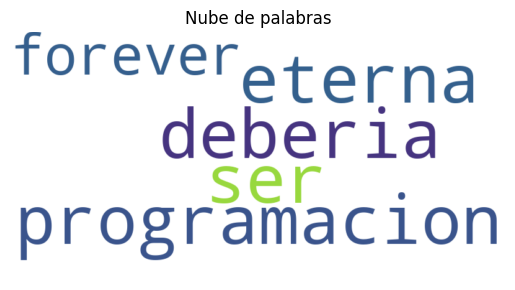

In [26]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt

nube_palabras = WordCloud(width=800, height=400, background_color='white').generate(' '.join(tokens_limpios))

plt.imshow(nube_palabras, interpolation='bilinear')
plt.axis('off')
plt.title("Nube de palabras")
plt.show()


---

## 7. Análisis de concordancia
Buscar patrones de palabras en contexto.

### Ejemplo:
```python

In [28]:
from nltk.text import Text

text = Text(word_tokenize(texto))
text.concordance("love")  # Encuentra frases que contienen "love"

no matches


```

### Ejercicio:
Buscar varias palabras relacionadas y comparar sus contextos.

In [32]:
from nltk.text import Text

texto = "i love python. i don't like java"

text = Text(word_tokenize(texto))
text.concordance("love")


Displaying 1 of 1 matches:
                                   i love python . i do n't like java


---

## 8. Extensiones futuras
- **Trabajar con datos reales:** Descarga un texto desde la web usando `requests` o `BeautifulSoup`.
- **Introducir conceptos básicos de stemming y lematización:**

```python

In [ ]:
from nltk.stem import PorterStemmer
stemmer = PorterStemmer()
print(stemmer.stem("running"))  # Resultado: run

```

### Ejercicio:
Probar diferentes algoritmos de stemming y comparar resultados.

In [34]:
from nltk.stem import PorterStemmer, LancasterStemmer


porter_stemmer = PorterStemmer()
lancaster_stemmer = LancasterStemmer()


print(porter_stemmer.stem("running"))  # Resultado: run
print(lancaster_stemmer.stem("running"))  # Resultado: run



run
run


---